In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ECS_271/cleaned_diabetes_data.csv")

In [ ]:
data.shape

(97883, 49)

In [ ]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_activity', 'medication_variation', 'total_medications',
       'primary_diag', 'secondary_diag', 'additional_diag'],
      dtype='object')

In [ ]:
data.head(5).T

,0,1,2,3,4
race,1,1,2,1,1
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,5,1,1,1,1
discharge_disposition_id,18,1,1,1,1
admission_source_id,1,9,9,9,9
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [ ]:
data.dtypes

,0
race,int64
gender,int64
age,int64
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats


nominal_features = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
    'A1Cresult', 'max_glu_serum', 'primary_diag', 'secondary_diag', 'additional_diag'
]

# Converting the above nominal features to 'object' type
for col in nominal_features:
    if col in data.columns:  # Check if the column exists in the DataFrame
        data[col] = data[col].astype('object')

# Displaying the value counts for each column in the 'object' type columns
for col in data.select_dtypes(include=['object']).columns:
    value_counts = data[col].value_counts()
    print(f"Value Counts for {col}:")
    print(pd.DataFrame(value_counts))
    print()

# Displaying the numerical columns without the target variable
numerical_columns = list(set(data.select_dtypes(include=['number']).columns) - {'readmitted'})
print("Numerical Columns:")
print(numerical_columns)

# Here is the Kurtosis and Skewness of the following variables
selected_numerical = [
    'total_medications', 'number_emergency', 'num_lab_procedures', 'patient_activity', 'time_in_hospital',
    'medication_variation', 'num_procedures', 'number_diagnoses', 'number_outpatient', 'num_medications', 'number_inpatient'
]
print("\nSkewness:")
print(data[selected_numerical].skew())
print("\nKurtosis:")
print(data[selected_numerical].kurt())

# Now we apply log trasformation for the variables that were highly skewed (skewness more than the threhsold)
log_transform_columns = selected_numerical
for col in log_transform_columns:
    if abs(data[col].skew()) >= 1:
        data[col + "_log"] = np.log1p(data[col])
        print(f"{col}_log: Skewness after log transformation = {data[col + '_log'].skew():.2f}")


Value Counts for race:
      count
race       
1     74854
2     18888
3      2024
0      1485
4       632

Value Counts for gender:
        count
gender       
0       52747
1       45136

Value Counts for age:
     count
age       
75   24978
65   21699
55   16743
85   16320
45    9408
35    3689
95    2601
25    1604
15     682
5      159

Value Counts for admission_type_id:
                   count
admission_type_id       
1                  69377
3                  18383
5                  10113
4                     10

Value Counts for discharge_disposition_id:
                          count
discharge_disposition_id       
1                         71989
2                         20387
18                         4646
7                           611
28                          138
10                           97
19                            8
27                            5
20                            2

Value Counts for admission_source_id:
                     count
admissi

In [ ]:
def standardize(data):
    # Data standardization by subtracting it by its mean followed by division by its standard deviation
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)


data[numerical_columns] = standardize(data[numerical_columns])

# Dropping columns with unnames values
data.drop(columns=[col for col in data.columns if 'unnamed' in col.lower()], inplace=True)

# Here is the numeric features' correlation matrix
data_corr_matrix = data[numerical_columns].corr()
data_corr_matrix


,number_emergency,patient_activity,medication_variation,total_medications,num_lab_procedures,num_procedures,number_outpatient,time_in_hospital,number_inpatient,num_medications,number_diagnoses
number_emergency,1.000000,0.606273,0.053808,0.007505,-0.001382,-0.038860,0.091286,-0.009788,0.266818,0.013742,0.054425
patient_activity,0.606273,1.000000,0.074161,-0.013019,0.016461,-0.066690,0.647440,0.031012,0.718069,0.066621,0.130277
medication_variation,0.053808,0.074161,1.000000,0.313205,0.117204,0.010142,0.029435,0.160688,0.065295,0.229139,0.073193
total_medications,0.007505,-0.013019,0.313205,1.000000,0.029475,0.004754,0.000264,0.075012,-0.029519,0.227674,0.013646
num_lab_procedures,-0.001382,0.016461,0.117204,0.029475,1.000000,0.052141,-0.008678,0.319027,0.039655,0.264021,0.148904
num_procedures,-0.038860,-0.066690,0.010142,0.004754,0.052141,1.000000,-0.025302,0.191581,-0.066977,0.381255,0.068461
number_outpatient,0.091286,0.647440,0.029435,0.000264,-0.008678,-0.025302,1.000000,-0.010085,0.106778,0.045077,0.092998
time_in_hospital,-0.009788,0.031012,0.160688,0.075012,0.319027,0.191581,-0.010085,1.000000,0.073775,0.464353,0.221438
number_inpatient,0.266818,0.718069,0.065295,-0.029519,0.039655,-0.066977,0.106778,0.073775,1.000000,0.065715,0.103145
num_medications,0.013742,0.066621,0.229139,0.227674,0.264021,0.381255,0.045077,0.464353,0.065715,1.000000,0.258193


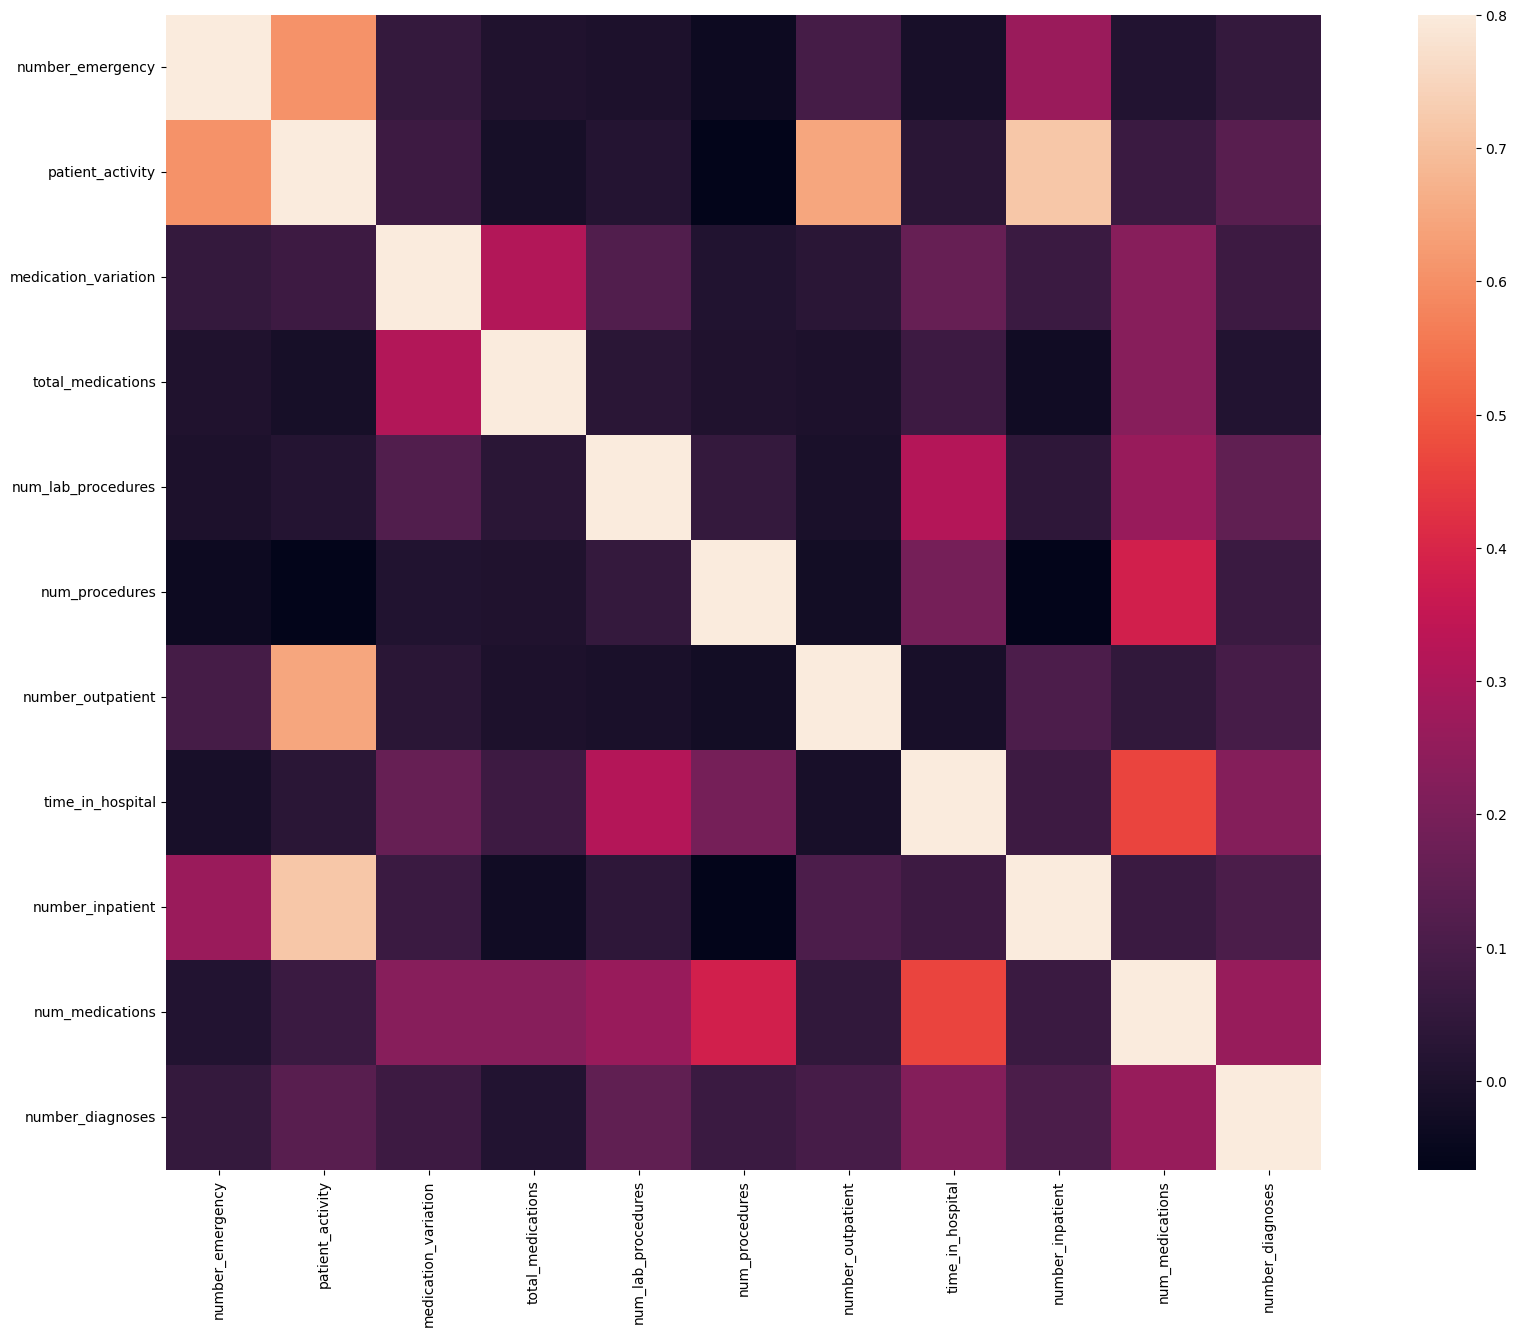

In [ ]:
a = plt.subplots(figsize=(25, 15))
a = sns.heatmap(data_corr_matrix, vmax=.8, square=True)

In [ ]:
# Now displaying the updated data types of the following columns

nominal_features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']

for feature in nominal_features:
    data[feature] = data[feature].fillna(0).astype('int64')


data.dtypes


<ipython-input-93-367153150106>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[feature] = data[feature].fillna(0).astype('int64')
<ipython-input-93-367153150106>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[feature] = data[feature].fillna(0).astype('int64')
<ipython-input-93-367153150106>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

,0
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,float64
num_lab_procedures,float64
num_procedures,float64
num_medications,float64


In [ ]:
import scipy.stats as sp
# Here are the numerical features we have to check outliers for with the help of z-scores
numerical_features = [
    'medication_variation', 'num_lab_procedures', 'total_medications', 'num_medications',
    'num_procedures', 'number_diagnoses', 'number_emergency',
    'number_inpatient', 'number_outpatient', 'patient_activity',
    'time_in_hospital'
]

# Removing rows with z-scores greater than 3
data = data[(np.abs(sp.stats.zscore(data[numerical_features])) < 3).all(axis=1)]


<ipython-input-94-98aa43ecfc41>:11: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  data = data[(np.abs(sp.stats.zscore(data[numerical_features])) < 3).all(axis=1)]


In [ ]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_activity', 'medication_variation', 'total_medications',
       'primary_diag', 'secondary_diag', 'additional_diag',
       'number_emergency_log', 'patient_activity_log', 'time_in_hospital_log

In [ ]:
for i in data.columns:
    df=data[i].value_counts()
    print(df)

race
1    68090
2    17275
3     1818
0     1346
4      590
Name: count, dtype: int64
gender
0    48181
1    40938
Name: count, dtype: int64
age
75    23003
65    19716
85    15188
55    15112
45     8352
35     3286
95     2467
25     1321
15      560
5       114
Name: count, dtype: int64
admission_type_id
1    63365
3    16483
5     9261
4       10
Name: count, dtype: int64
discharge_disposition_id
1     65653
2     18408
18     4287
7       537
28      127
10       93
19        8
27        4
20        2
Name: count, dtype: int64
admission_source_id
9     56717
1     27147
4      5239
8        11
11        5
Name: count, dtype: int64
time_in_hospital
-0.467585    16055
-0.803582    15559
-1.139580    12937
-0.131587    12456
 0.204411     8808
 0.540408     6515
 0.876406     5012
 1.212404     3713
 1.548401     2487
 1.884399     1927
 2.220397     1510
 2.556394     1169
 2.892392      971
Name: count, dtype: int64
num_lab_procedures
-2.134345    2923
 0.004121    2524
 0.055037  

In [ ]:
# Converting the 'primary_diag' column to integer type
data['primary_diag'] = data['primary_diag'].astype('int')

# Generating dummy variables for the following nominal columns and dropping the first one
data_v = pd.get_dummies(
    data,
    columns=[
        'race', 'gender', 'admission_type_id', 'discharge_disposition_id',
        'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag'
    ],
    drop_first=True
)

# List of nominal columns
nominal_columns = [
    'race', 'gender', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag'
]

# Extract numeric columns while excluding the "readmitted" and "change" columns
numeric_columns = list(set(data.select_dtypes(include=['number']).columns) - {'readmitted', 'change'})

# Generating a list of the new dummy variable columns
new_nominal_columns = [
    column for nominal_col in nominal_columns for column in data_v.columns if nominal_col in column
]

# Displaying them
new_nominal_columns

# Displaying every column in the transformed dataframe
data_v.columns

# This is the feature set we will use
feature_set = [
    'race_1', 'race_2', 'race_3', 'race_4', 'gender_1', 'age', 'admission_type_id_3',
    'admission_type_id_4', 'admission_type_id_5', 'discharge_disposition_id_2',
    'discharge_disposition_id_7', 'discharge_disposition_id_10', 'discharge_disposition_id_18',
    'discharge_disposition_id_19', 'discharge_disposition_id_20', 'discharge_disposition_id_27',
    'discharge_disposition_id_28', 'admission_source_id_4', 'admission_source_id_8',
    'admission_source_id_9', 'admission_source_id_11', 'num_lab_procedures', 'number_diagnoses',
    'max_glu_serum_1.0', 'A1Cresult_1', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
    'change', 'diabetesMed', 'num_med', 'primary_diag_1', 'primary_diag_2', 'primary_diag_3',
    'primary_diag_4', 'primary_diag_5', 'primary_diag_6', 'primary_diag_7', 'primary_diag_8',
    'number_emergency_log', 'patient_service_log', 'time_in_hospital_log', 'med_change_log',
    'num_procedures_log', 'number_outpatient_log', 'num_medications_log', 'number_inpatient_log'
]

# Saving this modified dataframe to a CSV file
data_v.to_csv('./modified_data.csv', index=False)


In [ ]:
data_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_activity', 'medication_variation', 'total_medications',
       'secondary_diag', 'additional_diag', 'number_emergency_log',
       'patient_activity_log', 'time_in_hospital_log',
       'medication_variation_log', 'num_procedures_log',
       'number_outpatient_log', 'num_medications_log', 'number_inpatient_log',
       'rac